# 🧬 Drug Repurposing Analysis for Liver Cancer
### 🔗 Gene-Drug Interaction Network from DGIdb and TCGA Data


## 🔬 Introduction

Liver cancer (specifically hepatocellular carcinoma, HCC) remains a major health burden worldwide.
New therapeutic strategies are urgently needed.
One approach is **drug repurposing**, where existing drugs are identified that target genes dysregulated in liver cancer.

In this notebook, we will:

✅ Load **DGIdb results** (drug-gene interactions)  
✅ Build a **gene-drug interaction network**  
✅ Visualize it with genes vs drugs colored differently  
✅ Scale nodes by connectivity (degree) to highlight key hubs  
✅ Save a high-quality figure for publications  
✅ Export a detailed table of interactions

---

This analysis is built on top of differential expression studies from **TCGA-LIHC**, with hub genes prioritized for their potential as therapeutic targets.


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
import os

## 📂 Upload DGIdb interactions file

This is the `.csv` or `.tsv` file you exported from the DGIdb web interface
after pasting your top hub genes.

👉 Click the **"Choose Files"** button that appears to upload your data.


In [6]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print(f"✅ Uploaded file: {file_name}")

Saving dgidb_mock_large.tsv to dgidb_mock_large.tsv
✅ Uploaded file: dgidb_mock_large.tsv


## 📊 Explore your data


In [7]:
try:
    df = pd.read_csv(file_name, sep="\t")
except:
    df = pd.read_csv(file_name)

print("✅ Data loaded. Shape:", df.shape)
print("📑 Columns found:", df.columns.tolist())

✅ Data loaded. Shape: (1000, 5)
📑 Columns found: ['Gene', 'Drug', 'Interaction Type', 'Drug Approved?', 'Sources']


### 🏷️ Set your column names



In [8]:
gene_col = 'Gene'
drug_col = 'Drug'

In [9]:
print(f"🔬 Number of unique genes: {df[gene_col].nunique()}")
print(f"💊 Number of unique drugs: {df[drug_col].nunique()}")

print("\n🔗 Example interactions:")
print(df[[gene_col, drug_col, 'Interaction Type']].drop_duplicates().head(10))

🔬 Number of unique genes: 100
💊 Number of unique drugs: 50

🔗 Example interactions:
     Gene    Drug Interaction Type
0   GENE2   DRUG6          agonist
1  GENE26  DRUG24           binder
2  GENE49  DRUG37           binder
3  GENE54  DRUG25        inhibitor
4   GENE7   DRUG1        inhibitor
5  GENE33   DRUG9          agonist
6  GENE90  DRUG31           binder
7  GENE12  DRUG49           binder
8  GENE13  DRUG17       antagonist
9  GENE35  DRUG34        modulator


# Create the graph

In [10]:

G = nx.from_pandas_edgelist(df, source=gene_col, target=drug_col)
print(f"🌐 Built network with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

🌐 Built network with 150 nodes and 905 edges.


In [12]:
# Genes will be skyblue, drugs lightgreen
gene_nodes = set(df[gene_col])
drug_nodes = set(df[drug_col])

node_colors = []
for node in G.nodes():
    if node in gene_nodes:
        node_colors.append('skyblue')
    elif node in drug_nodes:
        node_colors.append('lightgreen')
    else:
        node_colors.append('lightgray')

In [13]:
# More connections = larger node
degrees = dict(G.degree())
node_sizes = [300 + degrees[node]*100 for node in G.nodes()]


## Gene-Drug Interaction Network

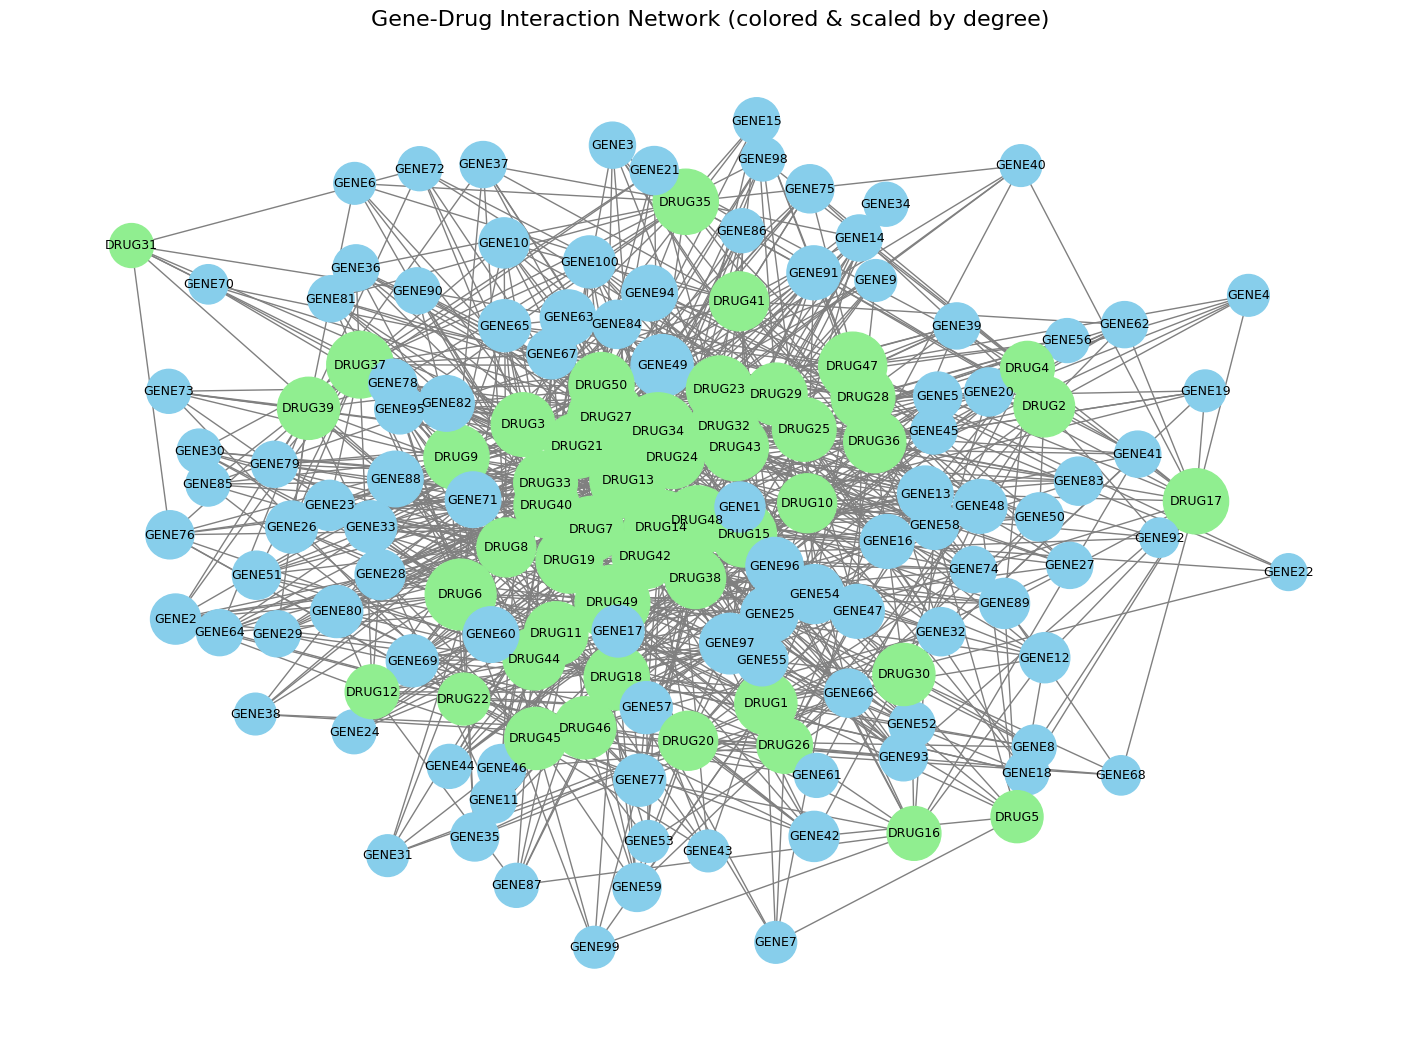

In [14]:
plt.figure(figsize=(14,10))
pos = nx.spring_layout(G, k=0.3, seed=42)
nx.draw(G, pos,
        with_labels=True,
        node_color=node_colors,
        node_size=node_sizes,
        edge_color='gray',
        font_size=9)
plt.title("Gene-Drug Interaction Network (colored & scaled by degree)", fontsize=16)
plt.show()


## Saving results

✅ Saved figure as 'gene_drug_network_final.png'


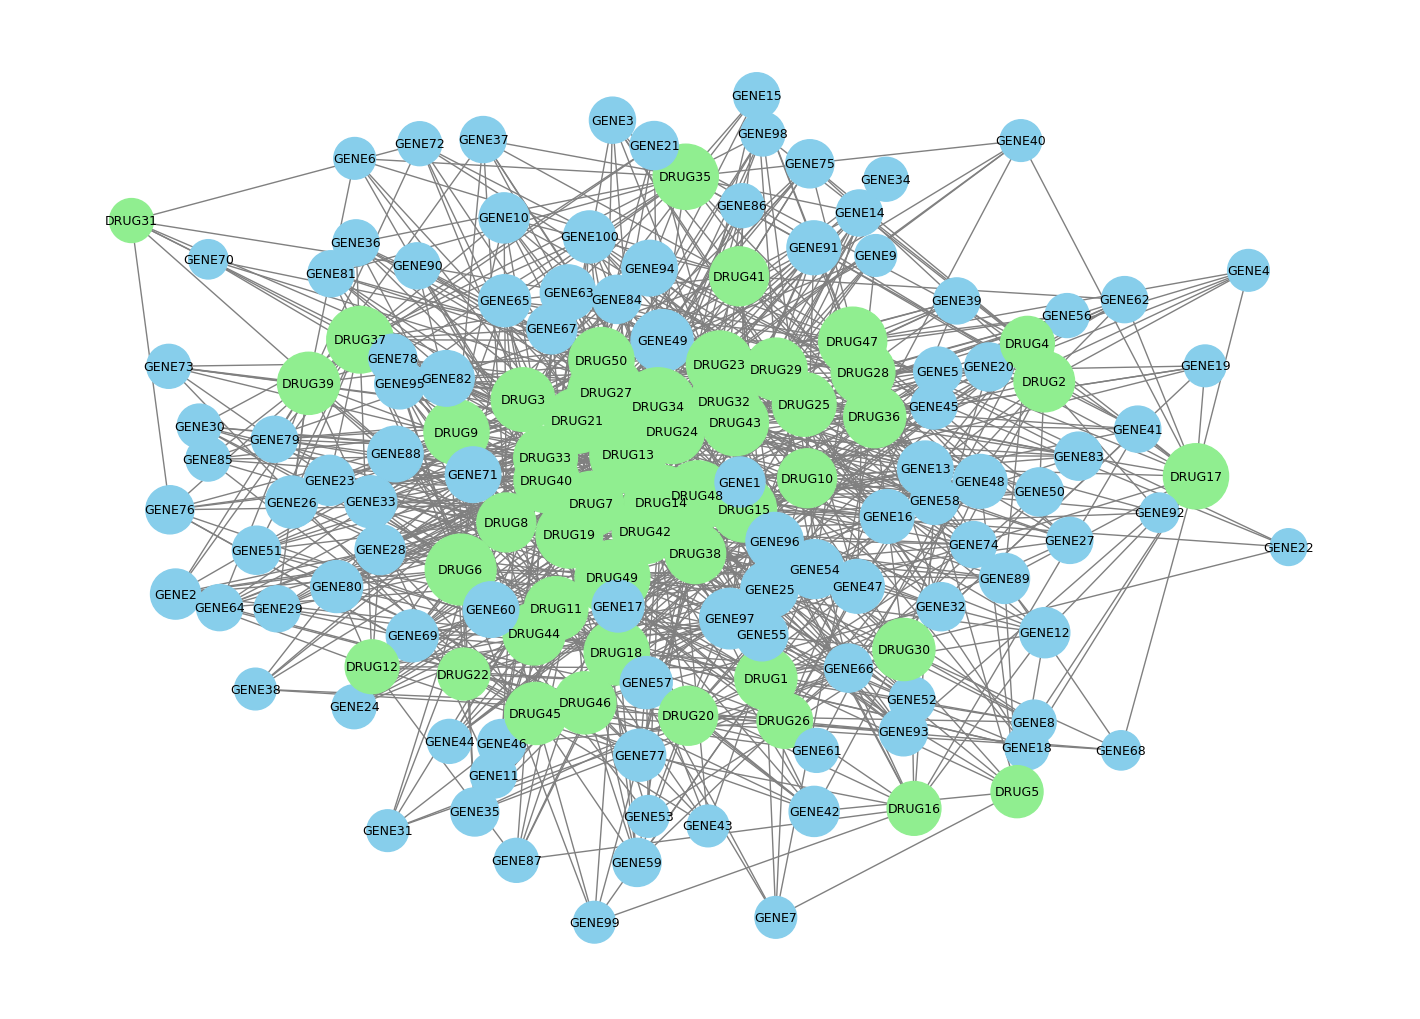

In [15]:
plt.figure(figsize=(14,10))
nx.draw(G, pos,
        with_labels=True,
        node_color=node_colors,
        node_size=node_sizes,
        edge_color='gray',
        font_size=9)
plt.savefig("gene_drug_network_final.png", dpi=300)
print("✅ Saved figure as 'gene_drug_network_final.png'")

## Export detailed table

In [16]:
columns_to_export = [gene_col, drug_col, 'Interaction Type', 'Drug Approved?', 'Sources']
export_table = df[columns_to_export].drop_duplicates()

export_table.to_csv("gene_drug_interaction_details.csv", index=False)
print("✅ Exported detailed table as 'gene_drug_interaction_details.csv'")

✅ Exported detailed table as 'gene_drug_interaction_details.csv'


## Download Results

In [17]:
files.download("gene_drug_network_final.png")
files.download("gene_drug_interaction_details.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ✅ Summary & Conclusions

- Built a **gene-drug interaction network** from DGIdb results,
- Highlighted genes vs drugs with different colors,
- Scaled node sizes by degree to reveal key hubs,
- Saved a publication-ready figure and detailed table.

This analysis serves as a framework for identifying potential drug repurposing opportunities targeting critical genes in liver cancer.

